# Step1:Loading Dataset into MongoDB

In [17]:
!pip install pymongo
#from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [10]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017')
db = client['Books']
collection = db['CSV1']
# List of your CSV files
csv_files = ['books2.csv', 'ratings.csv', 'users.csv']

# Iterate through CSV files and insert into MongoDB
for csv_file in csv_files:
    # Read CSV data
    csv_data = pd.read_csv(csv_file,encoding='latin1')

    # Convert DataFrame to dictionary (each row becomes a document)
    mongo_data = csv_data.to_dict(orient='records')

    # Insert data into MongoDB
    collection.insert_many(mongo_data)
print("\n Data added in mongodb sucessfully \n",)


 Data added in mongodb sucessfully 



# Step2:Retriving Dataset from MongoDB and performing ETL process in python

In [25]:
import pandas as pd

# Retrieve data from MongoDB
cursor = collection.find()
data = list(cursor)

# Perform ETL using pandas
df = pd.DataFrame(data)


books = pd.read_csv(r'C:\Users\vaish\OneDrive\Documents\Desktop\NCI_Project\DAP Datasets\books2.csv', delimiter=';', encoding='latin1', on_bad_lines='skip', low_memory=False)
ratings = pd.read_csv(r'C:\Users\vaish\OneDrive\Documents\Desktop\NCI_Project\DAP Datasets\ratings.csv', delimiter=';', encoding='latin1', on_bad_lines='skip', low_memory=False)
users= pd.read_csv(r'C:\Users\vaish\OneDrive\Documents\Desktop\NCI_Project\DAP Datasets\users.csv', delimiter=';', encoding='latin1', on_bad_lines='skip', low_memory=False)


In [34]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [35]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [36]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [38]:
ratings_books=pd.merge(ratings, books, on='ISBN')
merged_data = pd.merge(ratings_books, users, on='User-ID')

In [39]:
merged_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


In [40]:
merged_data.describe()

,User-ID,Book-Rating,Age
count,1.031132e+06,1.031132e+06,753299.000000
mean,1.405944e+05,2.839056e+00,37.397681
std,8.052476e+04,3.854159e+00,14.098255
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [42]:
users['Country'] = users['Location'].str.split(',').str[-1].str.strip()
users['Country'] = users['Location'].str.split(',').str[-1].str.strip().str.capitalize()


print(users.head(10))

   User-ID                            Location   Age         Country
0        1                  nyc, new york, usa   NaN             Usa
1        2           stockton, california, usa  18.0             Usa
2        3     moscow, yukon territory, russia   NaN          Russia
3        4           porto, v.n.gaia, portugal  17.0        Portugal
4        5  farnborough, hants, united kingdom   NaN  United kingdom
5        6       santa monica, california, usa  61.0             Usa
6        7                 washington, dc, usa   NaN             Usa
7        8            timmins, ontario, canada   NaN          Canada
8        9          germantown, tennessee, usa   NaN             Usa
9       10          albacete, wisconsin, spain  26.0           Spain


# step3:EDA Process

In [43]:
new_users_df = users[["Age", "Country"]]
print(new_users_df)

         Age         Country
0        NaN             Usa
1       18.0             Usa
2        NaN          Russia
3       17.0        Portugal
4        NaN  United kingdom
...      ...             ...
278853   NaN             Usa
278854  50.0  United kingdom
278855   NaN          Canada
278856   NaN             Usa
278857   NaN         Ireland

[278858 rows x 2 columns]


In [44]:
new_users_df.isnull().sum()

Age        110762
Country         0
dtype: int64

In [45]:
new_users_df = new_users_df[new_users_df["Country"] != ""]
new_users_df = new_users_df.sort_values(by=["Country"], ascending=True)
import re

new_users_df = new_users_df[new_users_df["Country"].str.match(r'^[a-zA-Z\s]+$')]

new_users_df.head(10)

,Age,Country
239001,NaN,A
104592,NaN,Aaa
141675,NaN,Adsgfdr
48164,26.0,Afghanistan
1206,NaN,Afghanistan
95851,73.0,Afghanistan
56234,80.0,Afghanistan
38906,NaN,Afghanistan
276929,31.0,Afghanistan
236522,25.0,Afghanistan


In [46]:
new_users_df.to_csv('cleaned_users.csv', index=False)

In [55]:
demography_df = pd.read_csv('cleaned_users.csv')
demography_df = pd.read_csv('cleaned_users.csv',header=1)
demography_df.head(5)


,Unnamed: 0,A
0,NaN,Aaa
1,NaN,Adsgfdr
2,26.0,Afghanistan
3,NaN,Afghanistan
4,73.0,Afghanistan


In [59]:
# Assuming 'Unnamed: 0' is the correct column name for age and 'A' for country
demography_df.rename(columns={'Unnamed: 0': 'age', 'A': 'country'}, inplace=True)

# Now you can use the 'age' and 'country' column names in your analysis
print(demography_df.head())


    age      country
0   NaN          Aaa
1   NaN      Adsgfdr
2  26.0  Afghanistan
3   NaN  Afghanistan
4  73.0  Afghanistan


In [60]:
demography_df = demography_df[demography_df['age'].notna()]  # Drop rows with NaN in 'age'

# load analysed data into Postgressql

In [89]:
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(database="books", user="vaish", password="Vaishnavi@2811", host="localhost", port="5432")
#cur = conn.cursor()

# Export DataFrame to PostgreSQL
df.to_sql(name='books','ratings','users', con=conn, if_exists='replace', index=False)

# Commit and close connection
conn.commit()
conn.close()
print("\n Data added in postgresql sucessfully \n",)


 Data added in postgresql sucessfully 



# Retrive Data from Postgresql to Visualise in Python

In [ ]:
# Connect to PostgreSQL
conn = psycopg2.connect(database="books", user="vaish", password="Vaishnavi@2811", host="localhost", port="5432")

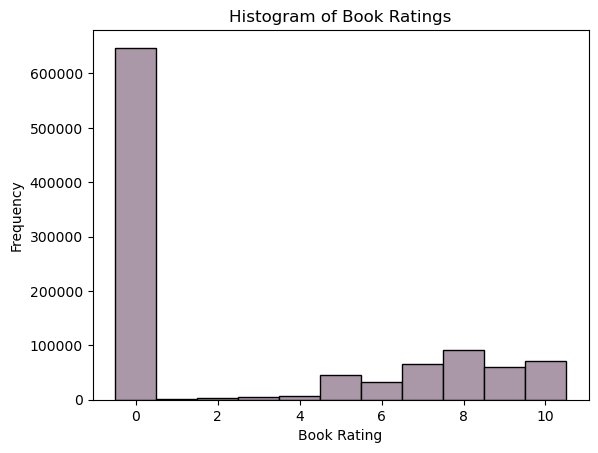

In [41]:

#We are interested in taking a closer look in ratings, so: 

# Extract the ratings variable from the ratings DataFrame
ratings = ratings_books["Book-Rating"]

# Histogram
plt.hist(ratings, bins=11, range=(-0.5, 10.5), edgecolor="black", color="#AA98A9")

# Add labels and title to the plot
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Book Ratings")

# Display the plot
plt.show()

In [61]:
demography_df.head()

,age,country
2,26.0,Afghanistan
4,73.0,Afghanistan
5,80.0,Afghanistan
7,31.0,Afghanistan
8,25.0,Afghanistan


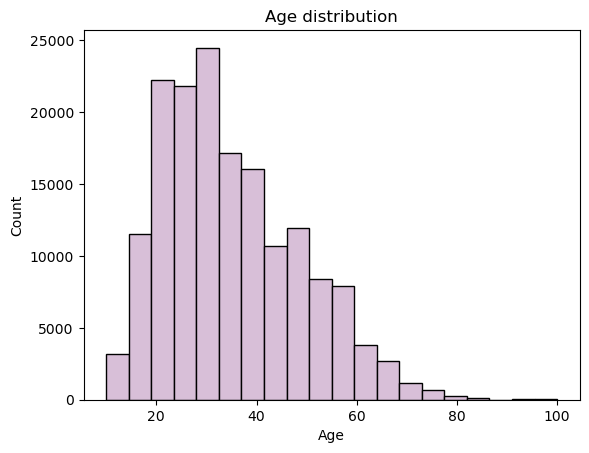

In [62]:
demography_df = demography_df[demography_df['age'] > 0]

min_age = 10
max_age = 100

demography_df = demography_df[(demography_df['age'] >= min_age) & (demography_df['age'] <= max_age)]

# Create a histogram
plt.hist(demography_df['age'],  color='#D8BFD8',edgecolor="black", bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()


In [66]:
demography_df.columns

Index(['age', 'country'], dtype='object')

In [67]:
new_merge = pd.concat([merged_data, demography_df], axis=1)
new_merge = new_merge.dropna()
new_merge.drop(columns=['Age'], axis=1, inplace=True)

new_merge.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,age,country
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",26.0,Afghanistan
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",73.0,Afghanistan
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",80.0,Afghanistan
7,2313,0345348036,9,The Princess Bride: S Morgenstern's Classic Ta...,WILLIAM GOLDMAN,1987,Del Rey,"cincinnati, ohio, usa",31.0,Afghanistan
8,2313,0553278223,7,The Martian Chronicles,RAY BRADBURY,1984,Spectra,"cincinnati, ohio, usa",25.0,Afghanistan


In [68]:
new_merge = new_merge.rename(columns={'age': 'Age'})
new_merge.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,country
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",26.0,Afghanistan
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",73.0,Afghanistan
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",80.0,Afghanistan
7,2313,0345348036,9,The Princess Bride: S Morgenstern's Classic Ta...,WILLIAM GOLDMAN,1987,Del Rey,"cincinnati, ohio, usa",31.0,Afghanistan
8,2313,0553278223,7,The Martian Chronicles,RAY BRADBURY,1984,Spectra,"cincinnati, ohio, usa",25.0,Afghanistan


In [69]:
new_merge.describe()

,User-ID,Book-Rating,Age
count,120362.000000,120362.000000,120362.000000
mean,145291.471727,1.826158,34.930119
std,79698.035861,3.456640,13.672230
min,496.000000,0.000000,10.000000
25%,76352.000000,0.000000,24.000000
50%,153662.000000,0.000000,32.000000
75%,217375.000000,0.000000,44.000000
max,278843.000000,10.000000,100.000000


In [70]:
new_merge.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Location', 'Age', 'country'],
      dtype='object')

In [71]:
# Convert Year-Of-Publication column to numeric and drop rows with non-numeric values
new_merge = new_merge[pd.to_numeric(new_merge['Year-Of-Publication'], errors='coerce').notnull()]

# Convert Year-Of-Publication column to int
new_merge['Year-Of-Publication'] = new_merge['Year-Of-Publication'].astype(int)

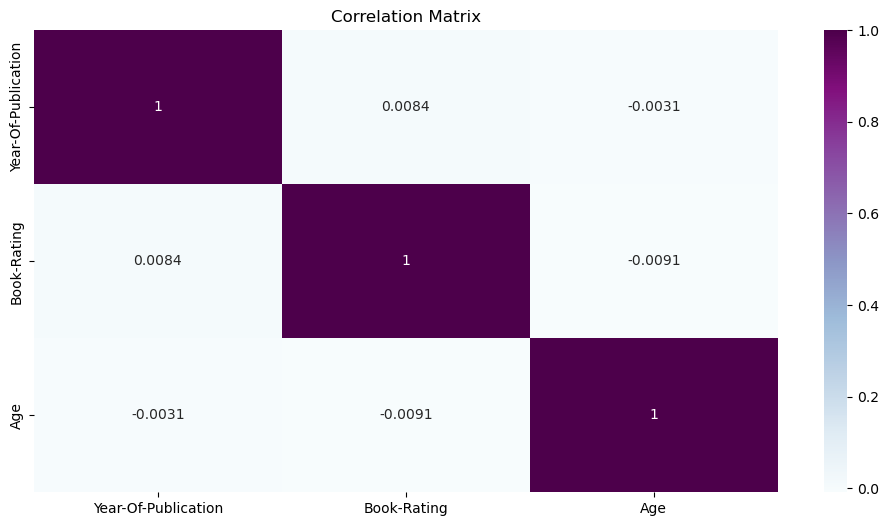

In [72]:
# Create a correlation matrix
corr_matrix = new_merge[['Year-Of-Publication', 'Book-Rating', 'Age']].corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

In [73]:
print(corr_matrix)

                     Year-Of-Publication  Book-Rating       Age
Year-Of-Publication             1.000000     0.008412 -0.003135
Book-Rating                     0.008412     1.000000 -0.009082
Age                            -0.003135    -0.009082  1.000000


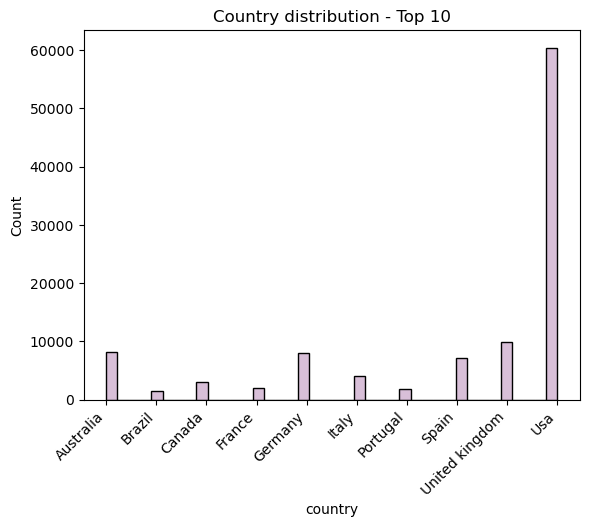

In [75]:
# Create a histogram. But remember, the Country list is massive so we are limiting it to the top 10

# Get the top 10 countries by count
top_countries = new_merge['country'].value_counts().nlargest(10).index.tolist()

# Filter to include only the top 10 countries
new_merge_top_countries = new_merge[new_merge['country'].isin(top_countries)]

# Create a histogram
plt.hist(new_merge_top_countries['country'],  edgecolor="black", color='#D8BFD8', bins=40)
plt.xlabel('country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Country distribution - Top 10')
plt.show()


C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


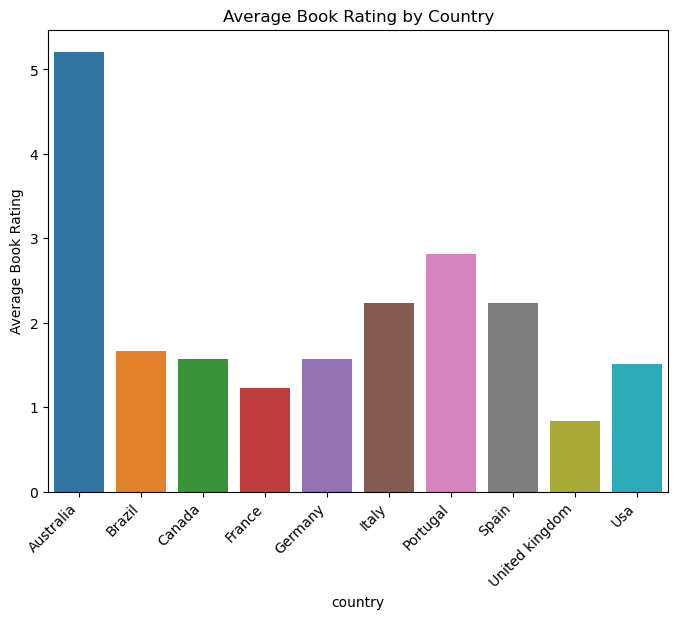

In [78]:
grouped = new_merge_top_countries.groupby('country')['Book-Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='country', y='Book-Rating', data=grouped)
plt.xticks(rotation=45, ha='right')
plt.xlabel('country')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Country')
plt.show()


C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

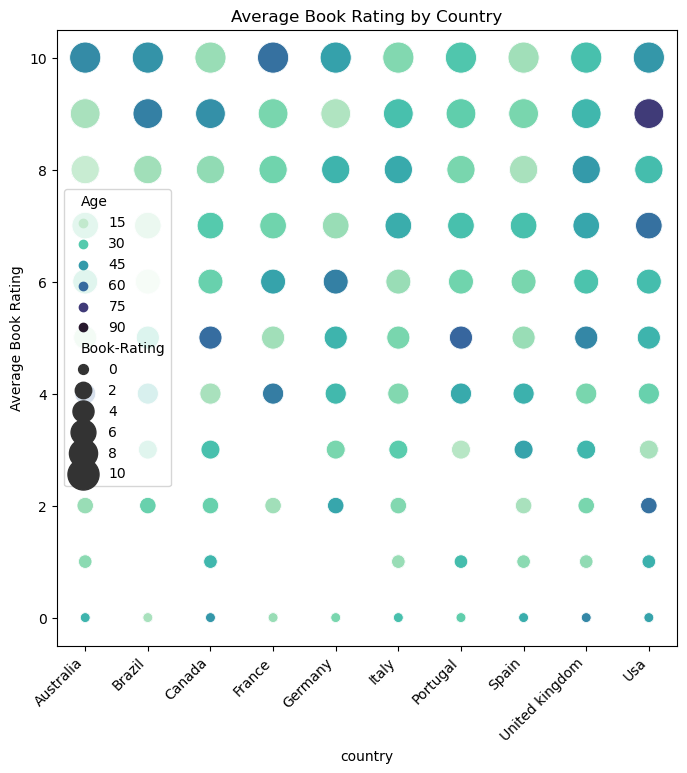

In [80]:
# Filter the data to include only the top 10 countries
top_countries = new_merge['country'].value_counts().nlargest(10).index.tolist()
new_merge_top_countries = new_merge[new_merge['country'].isin(top_countries)]

# Group the data by Countries and calculate the mean rating for each book
grouped = new_merge_top_countries.groupby('country')['Book-Rating'].mean().reset_index()

# Plot!
plt.figure(figsize=(8, 8))

cmap = sns.color_palette("mako_r", as_cmap=True)

sns.scatterplot(data=new_merge_top_countries, x='country', y='Book-Rating', hue='Age', size='Book-Rating', sizes=(50, 500), palette=cmap)
plt.xticks(rotation=45, ha='right')
plt.xlabel('country')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Country')
plt.show()

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


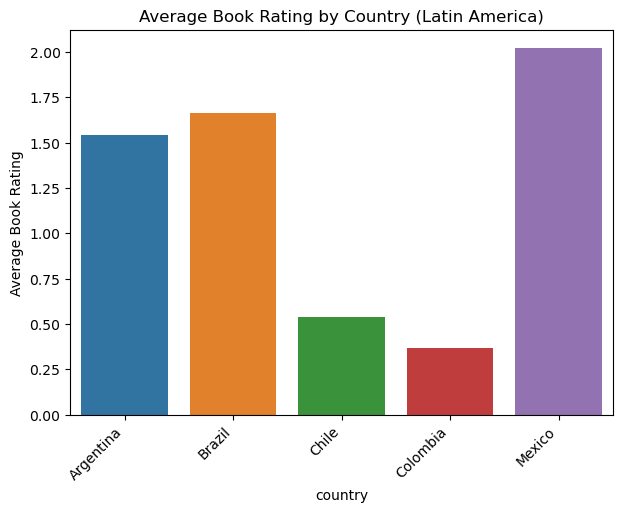

In [81]:
# List of countries to include: (make sure they are written as in the cvs file)
countries = ['Mexico', 'Colombia', 'Brazil', 'Chile', 'Argentina']

# Filter dataframe to include only the 5 LATAM countries
new_merge_top_countries_latam = new_merge[new_merge['country'].isin(countries)]

# Group the data by country and calculate the mean book rating to know how these countries tend to rate
grouped = new_merge_top_countries_latam.groupby('country')['Book-Rating'].mean().reset_index()

# Plot!
plt.figure(figsize=(7, 5))
sns.barplot(x='country', y='Book-Rating', data=grouped)
plt.xticks(rotation=45, ha='right')
plt.xlabel('country')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Country (Latin America)')
plt.show()

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


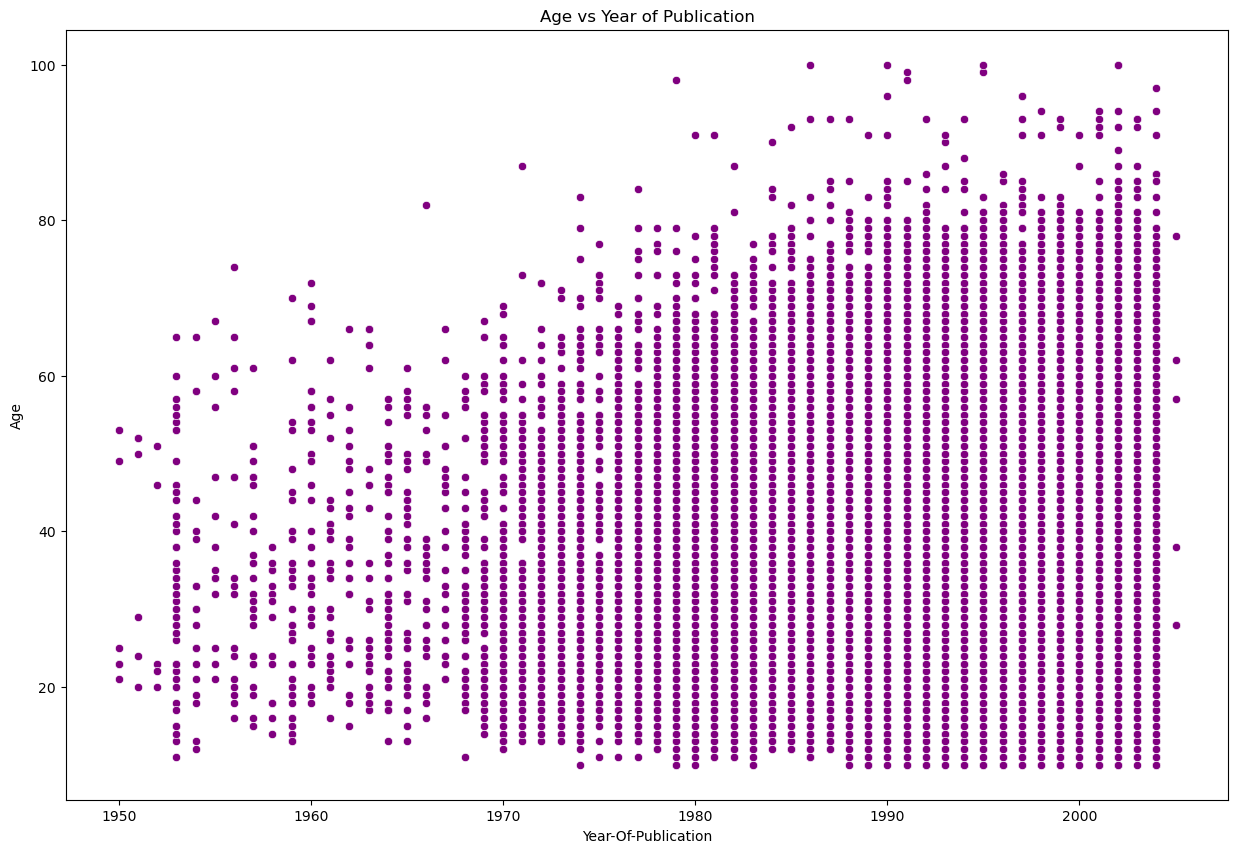

In [82]:
#We are also gonna filter year of publication to the years 1900 to 2010 because otherwise its hard to see

# Filter the data for years between 1950 and 2010
filtered_data = new_merge.loc[(new_merge['Year-Of-Publication'] >= 1950) & (new_merge['Year-Of-Publication'] <= 2010)]

# Create the scatter plot using Seaborn
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Year-Of-Publication', y='Age', data=filtered_data, color='purple')
plt.title('Age vs Year of Publication')
plt.show()


C:\Users\vaish\AppData\Local\Temp\ipykernel_21076\3090916945.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = new_merge.groupby(['Year-Of-Publication', 'Age Group'])['Book-Rating'].count().reset_index()


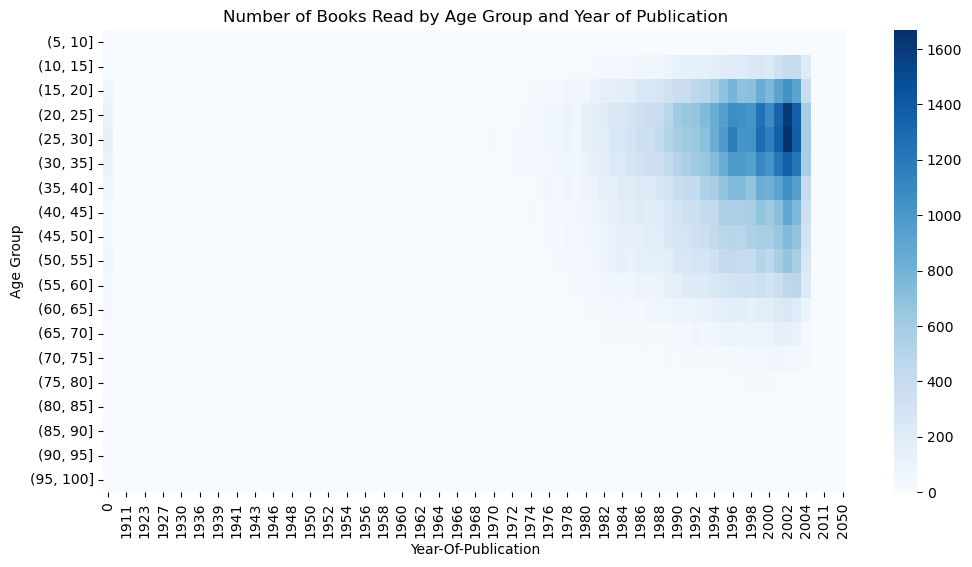

In [83]:
# Age groups and Age group to DF
age_bins = pd.cut(new_merge['Age'], bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
new_merge['Age Group'] = age_bins

# Group data to plot by year of publication, age group, and count number of books read
grouped_data = new_merge.groupby(['Year-Of-Publication', 'Age Group'])['Book-Rating'].count().reset_index()

# Heatmap
heatmap_data = grouped_data.pivot(index='Age Group', columns='Year-Of-Publication', values='Book-Rating')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Number of Books Read by Age Group and Year of Publication')
plt.show()